## Water Demand Tutorial

In [1]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
from fuzzywuzzy import fuzz
import geopandas as gpd
import matplotlib.pyplot as plt
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

#
# generate matplotlib handles to create a legend of the features we put in our map.
def generate_handles(labels, colors, edge='k', alpha=1):
    lc = len(colors)  # get the length of the color list
    handles = []
    for i in range(len(labels)):
        handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i % lc], edgecolor=edge, alpha=alpha))
    return handles


# create a scale bar of length 20 km in the upper right corner of the map
# adapted this question: https://stackoverflow.com/q/32333870
# answered by SO user Siyh: https://stackoverflow.com/a/35705477
def scale_bar(ax, location=(0.92, 0.95)):
    x0, x1, y0, y1 = ax.get_extent()
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    ax.plot([sbx, sbx - 20000], [sby, sby], color='k', linewidth=9, transform=ax.projection)
    ax.plot([sbx, sbx - 10000], [sby, sby], color='k', linewidth=6, transform=ax.projection)
    ax.plot([sbx-10000, sbx - 20000], [sby, sby], color='w', linewidth=6, transform=ax.projection)

    ax.text(sbx, sby-4500, '20 km', transform=ax.projection, fontsize=8)
    ax.text(sbx-12500, sby-4500, '10 km', transform=ax.projection, fontsize=8)
    ax.text(sbx-24500, sby-4500, '0 km', transform=ax.projection, fontsize=8)

In [2]:
# load the outline of UK for a backdrop
outline = gpd.read_file(os.path.abspath('data_files/Outline.shp'))

In [3]:
wrz = gpd.read_file(os.path.abspath('data_files/WaterSupplyAreas_incNAVs v1_4.shp'))

In [4]:
wrz.head(10)

,AreaServed,ID,COMPANY,Acronym,CoType,AreaType,Disclaimer,Disclaim2,Disclaim3,Provenance,Licence,WARNINGS,Created,LastUpdate,Version,Revisions,geometry
0,Hafren Dyfrdwy,8,Hafren Dyfrdwy,HDD,regional water and sewerage company,Whole water supply area,This shapefile is designed for geospatial anal...,This shapefile does not include information on...,For the purposes of geospatial analysis and vi...,This shapefile has been digitised from the leg...,This shapefile is published under the Open Gov...,NaN,2020-08-04,2022-05-25,1_4,NaN,"MULTIPOLYGON (((270265.160 298975.320, 270253...."
1,Severn Trent,15,Severn Trent Water,SVE,regional water and sewerage company,Part of water supply area,This shapefile is designed for geospatial anal...,This shapefile does not include information on...,For the purposes of geospatial analysis and vi...,This shapefile has been digitised from the leg...,This shapefile is published under the Open Gov...,NaN,2020-08-04,2022-05-25,1_4,NaN,"MULTIPOLYGON (((351306.397 342962.953, 351307...."
2,Wessex,35,Wessex Water,WSX,regional water and sewerage company,Whole water supply area,This shapefile is designed for geospatial anal...,This shapefile does not include information on...,For the purposes of geospatial analysis and vi...,This shapefile has been digitised from the leg...,This shapefile is published under the Open Gov...,NaN,2020-08-04,2022-05-25,1_4,NaN,"MULTIPOLYGON (((329985.180 147446.790, 329981...."
3,Medway,27,Southern Water,SRN,regional water and sewerage company,Part of water supply area,This shapefile is designed for geospatial anal...,This shapefile does not include information on...,For the purposes of geospatial analysis and vi...,This shapefile has been digitised from the leg...,This shapefile is published under the Open Gov...,NaN,2020-08-04,2022-05-25,1_4,NaN,"MULTIPOLYGON (((600752.000 166231.400, 600715...."
4,Bristol,6,South West Water,SWB,regional water only company,Whole water supply area,This shapefile is designed for geospatial anal...,This shapefile does not include information on...,For the purposes of geospatial analysis and vi...,This shapefile has been digitised from the leg...,This shapefile is published under the Open Gov...,NaN,2020-08-04,2022-05-25,1_4,revised v1_3 - Bristol Water was bought by SWB...,"MULTIPOLYGON (((323052.420 160839.450, 323059...."
5,Guildford,31,Thames Water,TMS,regional water and sewerage company,Part of water supply area,This shapefile is designed for geospatial anal...,This shapefile does not include information on...,For the purposes of geospatial analysis and vi...,This shapefile has been digitised from the leg...,This shapefile is published under the Open Gov...,NaN,2020-08-04,2022-05-25,1_4,NaN,"POLYGON ((510314.889 150129.589, 510413.577 15..."
6,Suffolk,11,Northumbrian Water,NES,regional water and sewerage company,Part of water supply area,This shapefile is designed for geospatial anal...,This shapefile does not include information on...,For the purposes of geospatial analysis and vi...,This shapefile has been digitised from the leg...,This shapefile is published under the Open Gov...,NaN,2020-08-04,2022-05-25,1_4,NaN,"MULTIPOLYGON (((640379.180 256253.590, 640398...."
7,Tendring Hundred (Brett),2,Affinity Water,AFW,regional water only company,Part of water supply area,This shapefile is designed for geospatial anal...,This shapefile does not include information on...,For the purposes of geospatial analysis and vi...,This shapefile has been digitised from the leg...,This shapefile is published under the Open Gov...,NaN,2020-08-04,2022-05-25,1_4,NaN,"MULTIPOLYGON (((614672.690 212665.650, 614663...."
8,Kent & Sussex,16,South East Water,SEW,regional water only company,Part of water supply area,This shapefile is designed for geospatial anal...,This shapefile does not include information on...,For the purposes of geospatial analysis and vi...,This shapefile has been digitised from the leg...,This shapefile is published under the Open Gov...,NaN,2020

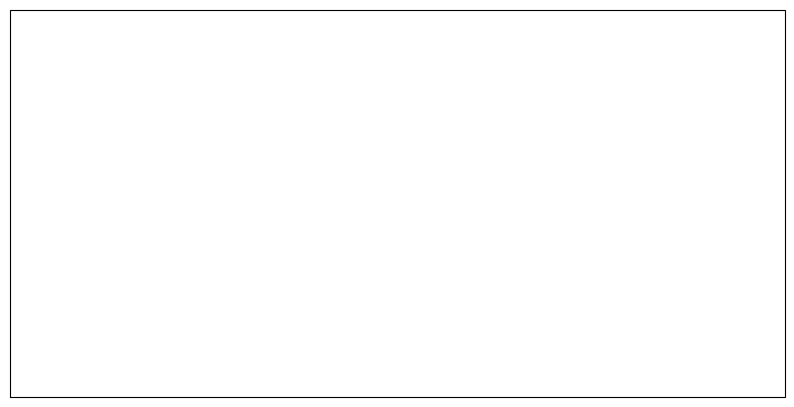

In [5]:
myFig = plt.figure(figsize=(10, 10))  # create a figure of size 10x10 (representing the page size in inches)

myCRS = ccrs.TransverseMercator(27700)  # create a Universal Transverse Mercator reference system to transform our data.

ax = plt.axes(projection=myCRS)  # finally, create an axes object in the figure, using a UTM projection,
# where we can actually plot our data.

In [6]:
# first, we just add the outline of Northern Ireland using cartopy's ShapelyFeature
outline_feature = ShapelyFeature(outline['geometry'], myCRS, edgecolor='k', facecolor='w')
xmin, ymin, xmax, ymax = outline.total_bounds
ax.add_feature(outline_feature) # add the features we've created to the map.

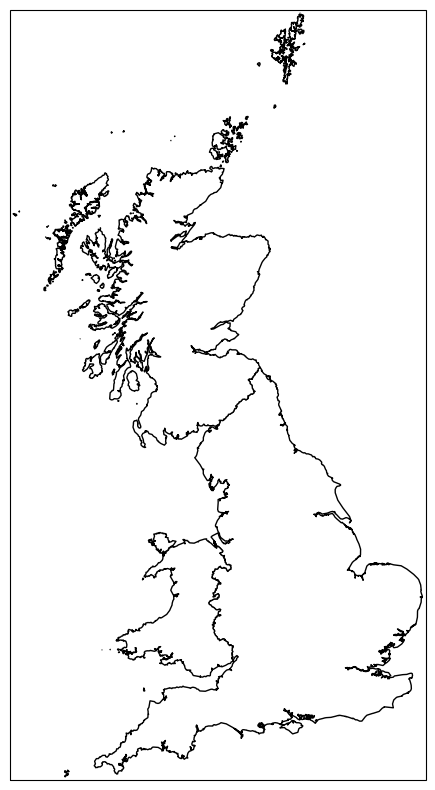

In [7]:
# using the boundary of the shapefile features, zoom the map to our area of interest
ax.set_extent([xmin-5000, xmax+5000, ymin-5000, ymax+5000], crs=myCRS) # because total_bounds 
# gives output as xmin, ymin, xmax, ymax,
# but set_extent takes xmin, xmax, ymin, ymax, we re-order the coordinates here.

myFig ## re-draw the figure

In [8]:
# get the number of unique water companies we have in the dataset
num_wrz = len(wrz.COMPANY.unique())
print('Number of unique features: {}'.format(num_wrz))

Number of unique features: 27


In [9]:
# pick colors for the individual water companies
# Generate random RGB colors
num_colors = num_wrz  # Number of colors to generate
company_colours = np.random.rand(num_colors, 3)  # Generate random RGB values

In [10]:
# get a list of unique names for the company boundaries
company_names = list(wrz.COMPANY.unique())
company_names.sort() # sort the companies alphabetically by name

In [11]:
# next, add the company outlines to the map using the colors that we've picked.
for ii, name in enumerate(company_names):
    feat = ShapelyFeature(wrz.loc[wrz['COMPANY'] == name, 'geometry'], # first argument is the geometry
                          myCRS, # second argument is the CRS
                          edgecolor='k', # outline the feature in black
                          facecolor=company_colours[ii], # set the face color to the corresponding color from the list
                          linewidth=1, # set the outline width to be 1 pt
                          alpha=0.25) # set the alpha (transparency) to be 0.25 (out of 1)
    ax.add_feature(feat) # once we have created the feature, we have to add it to the map using ax.add_feature()

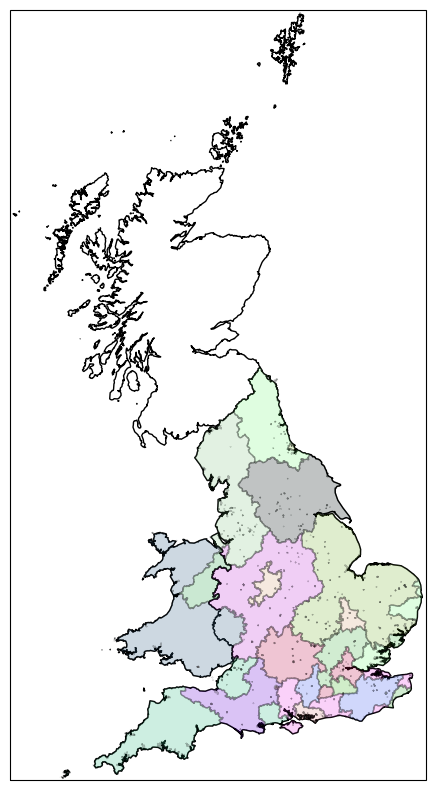

In [12]:
myFig # to show the updated figure

In [13]:
# generate a list of handles for the wrz datasets
#company_handles = generate_handles(wrz.COMPANY.unique(), company_colours, alpha=0.25)

In [14]:
# Create a list of handles explicitly
#handles = [mpatches.Patch(facecolor=company_colours[ii], edgecolor='k', linewidth=1, alpha=0.25) for ii in range(len(company_names))]

# Pass handles and company_names to ax.legend()
#leg = ax.legend(handles, company_names, title='Legend', title_fontsize=6, 
                 #fontsize=10, loc='upper left', frameon=True, framealpha=1)

#myFig # to show the updated figure


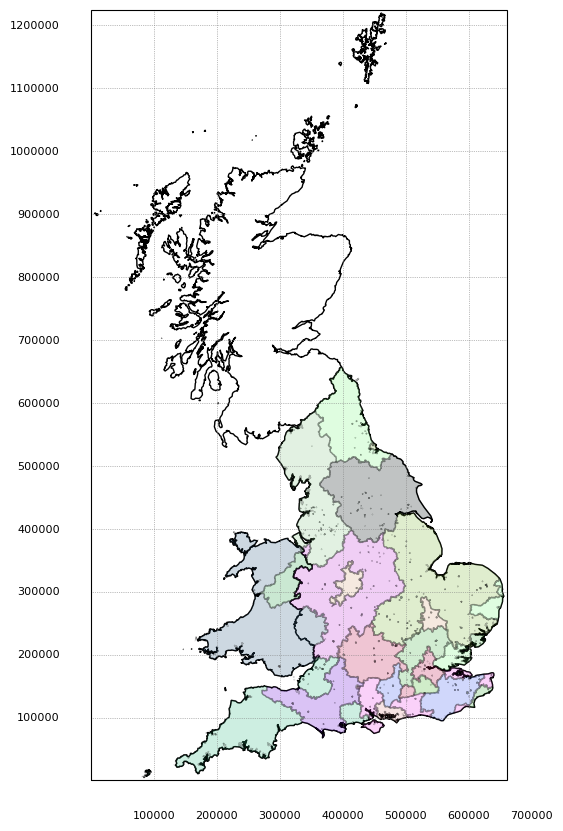

In [15]:
# Add vertical gridlines
ax.vlines(x=[100000, 200000, 300000, 400000, 500000, 600000, 700000],
          ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1],
          color='gray', linestyle=':', linewidth=0.5)

# Add horizontal gridlines
ax.hlines(y=[100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000],
          xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1],
          color='gray', linestyle=':', linewidth=0.5)

# Add labels to x-axis
x_ticks = [100000, 200000, 300000, 400000, 500000, 600000, 700000]
for x in x_ticks:
    ax.text(x, ax.get_ylim()[0] - 50000, str(x), ha='center', va='top', fontsize=8)

# Add labels to y-axis
y_ticks = [100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000]
for y in y_ticks:
    ax.text(ax.get_xlim()[0] - 50000, y, str(y), ha='right', va='center', fontsize=8)

ax.set_xlabel('X Axis Label')
ax.set_ylabel('Y Axis Label')

myFig # to show the updated figure

In [16]:
#go back and resolve colour issues and make the graph pretty

In [17]:
print(wrz.crs == outline.crs) # test if the crs is the same for roads_itm and counties.

True


In [18]:
wrz.loc[1]

AreaServed                                         Severn Trent
ID                                                           15
COMPANY                                      Severn Trent Water
Acronym                                                     SVE
CoType                      regional water and sewerage company
AreaType                              Part of water supply area
Disclaimer    This shapefile is designed for geospatial anal...
Disclaim2     This shapefile does not include information on...
Disclaim3     For the purposes of geospatial analysis and vi...
Provenance    This shapefile has been digitised from the leg...
Licence       This shapefile is published under the Open Gov...
WARNINGS                                                    NaN
Created                                              2020-08-04
LastUpdate                                           2022-05-25
Version                                                     1_4
Revisions                               

In [20]:
# Append PCC for 2019 to 2020 to the wrz geodataframe
# Load the GeoDataFrame
wrz = gpd.read_file(os.path.abspath('data_files/WaterSupplyAreas_incNAVs v1_4.shp'))  # replace 'wrz.shp' with the path to your shapefile

# Load the CSV file
pr24_hist_pcc = pd.read_csv('data_files/pr24_hist_pcc.csv')  # replace 'pr24_hist_pcc.csv' with the path to your CSV file

# Perform the merge
merged = wrz.merge(pr24_hist_pcc[['Company', '2019-20']], how='left', left_on='Acronym', right_on='Company')

# Drop the unnecessary columns
merged.drop(['Company'], axis=1, inplace=True)

# Rename the merged column
merged.rename(columns={'2019-20': '2019-20_from_CSV'}, inplace=True)

# Update the wrz GeoDataFrame with the merged column
wrz['2019-20'] = merged['2019-20_from_CSV']

# Check the updated GeoDataFrame
wrz.loc[1]

AreaServed                                         Severn Trent
ID                                                           15
COMPANY                                      Severn Trent Water
Acronym                                                     SVE
CoType                      regional water and sewerage company
AreaType                              Part of water supply area
Disclaimer    This shapefile is designed for geospatial anal...
Disclaim2     This shapefile does not include information on...
Disclaim3     For the purposes of geospatial analysis and vi...
Provenance    This shapefile has been digitised from the leg...
Licence       This shapefile is published under the Open Gov...
WARNINGS                                                    NaN
Created                                              2020-08-04
LastUpdate                                           2022-05-25
Version                                                     1_4
Revisions                               